# Visualize phylogenetic tree
This Python Jupyter notebook analyzes and visualizes the Spike phylogenetic tree.

## Imports and configuration
Import modules and read configuration file:

In [3]:
import os
import io

import ete3

import pandas as pd

import yaml

Read configuration:

In [4]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

## Visualize phylogenetic tree
Read and plot the trees using [ete3](http://etetoolkit.org/):

Reading tree from results/timetree/divergence_tree.newick


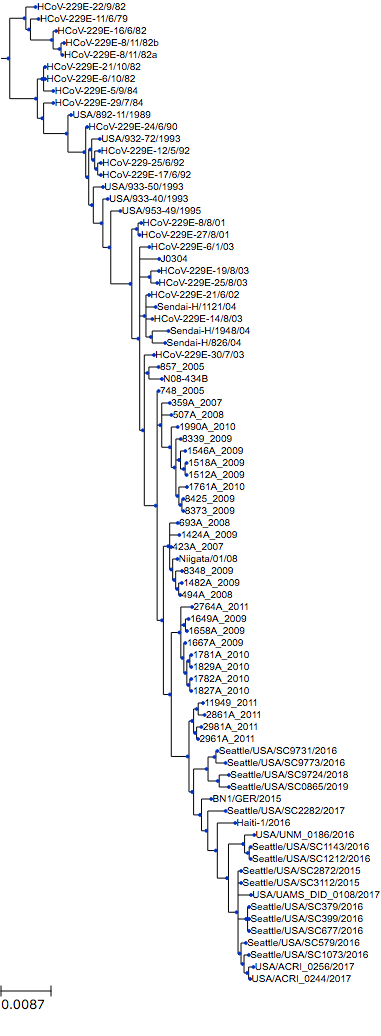

Reading tree from results/timetree/timetree.newick


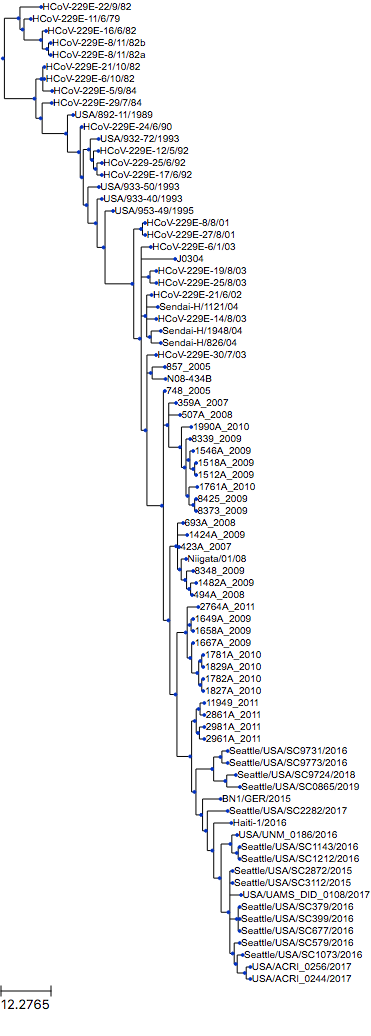

In [8]:
for branch_len in ['divergence', 'time']:
    treefile = config[f"{branch_len}tree"]
    print(f"Reading tree from {treefile}")
    t = ete3.Tree(treefile, format=1)
    display(t.render('%%inline'))

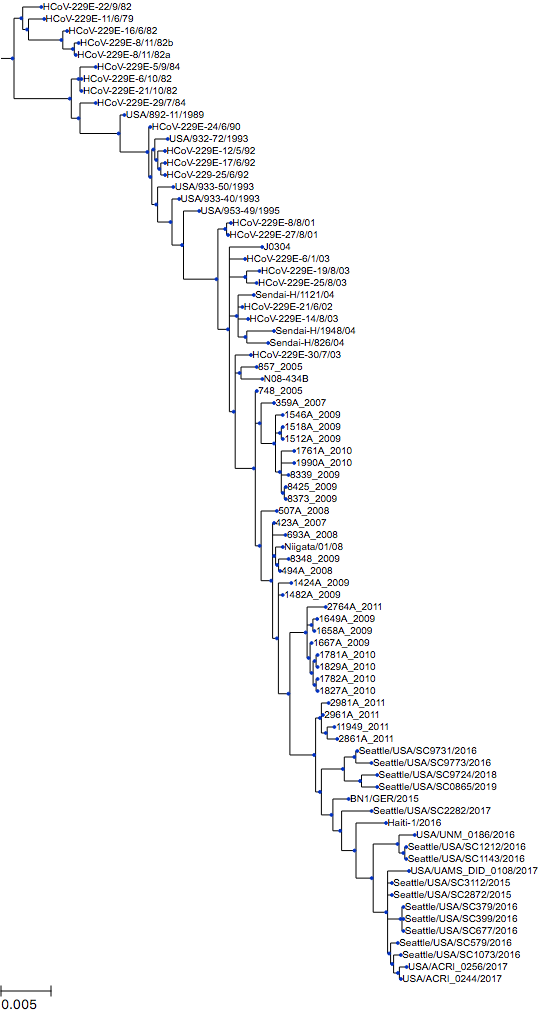

In [44]:
ts = ete3.TreeStyle()
ts.show_leaf_name = True  # show tip names
ts.scale = 10000  # pixels per branch-length unit

t.render('%%inline', tree_style=ts)

In [5]:
import pandas as pd

import Bio.Phylo

metadata = pd.read_csv(config['spikes_metadata'])

tree = Bio.Phylo.read(config['spikes_iqtree'], format='newick')
tips = [tip.name for tip in tree.get_terminals()]
for tip in tips:
    if tip not in metadata['name'].values:
        print(tip)
        
print(metadata['name'])

0           HCoV-229E-11/6/79
1           HCoV-229E-16/6/82
2           HCoV-229E-22/9/82
3           HCoV-229E-6/10/82
4          HCoV-229E-21/10/82
               ...           
77     USA/UAMS_DID_0108/2017
78         USA/ACRI_0256/2017
79         USA/ACRI_0244/2017
80    Seattle/USA/SC9724/2018
81    Seattle/USA/SC0865/2019
Name: name, Length: 82, dtype: object


In [36]:
treetime_dir = 'results/treetime'
os.makedirs(treetime_dir, exist_ok=True)



! treetime \
    --aln {config['spikes_aligned_codon']} \
    --dates {config['spikes_metadata']} \
    --tree {config['spikes_iqtree']} \
    --outdir {treetime_dir}


Attempting to parse dates...
	Using column 'name' as name. This needs match the taxon names in the tree!!
	Using column 'date' as date.

0.00	-TreeAnc: set-up

0.38	WARNING: Previous versions of TreeTime (<0.7.0) RECONSTRUCTED sequences of
    	tips at positions with AMBIGUOUS bases. This resulted in unexpected
    	behavior is some cases and is no longer done by default. If you want to
    	replace those ambiguous sites with their most likely state, rerun with
    	`reconstruct_tip_states=True` or `--reconstruct-tip-states`.

1.28	TreeTime.reroot: with method or node: least-squares

1.28	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.

1.63	TreeTime.reroot: with method or node: least-squares

1.63	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.

2.37	###TreeTime.run: INITIAL ROUND

6.45	TreeTime.reroot: with method or node: least-squares

6.45	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.

6.74	###TreeTime.run: re

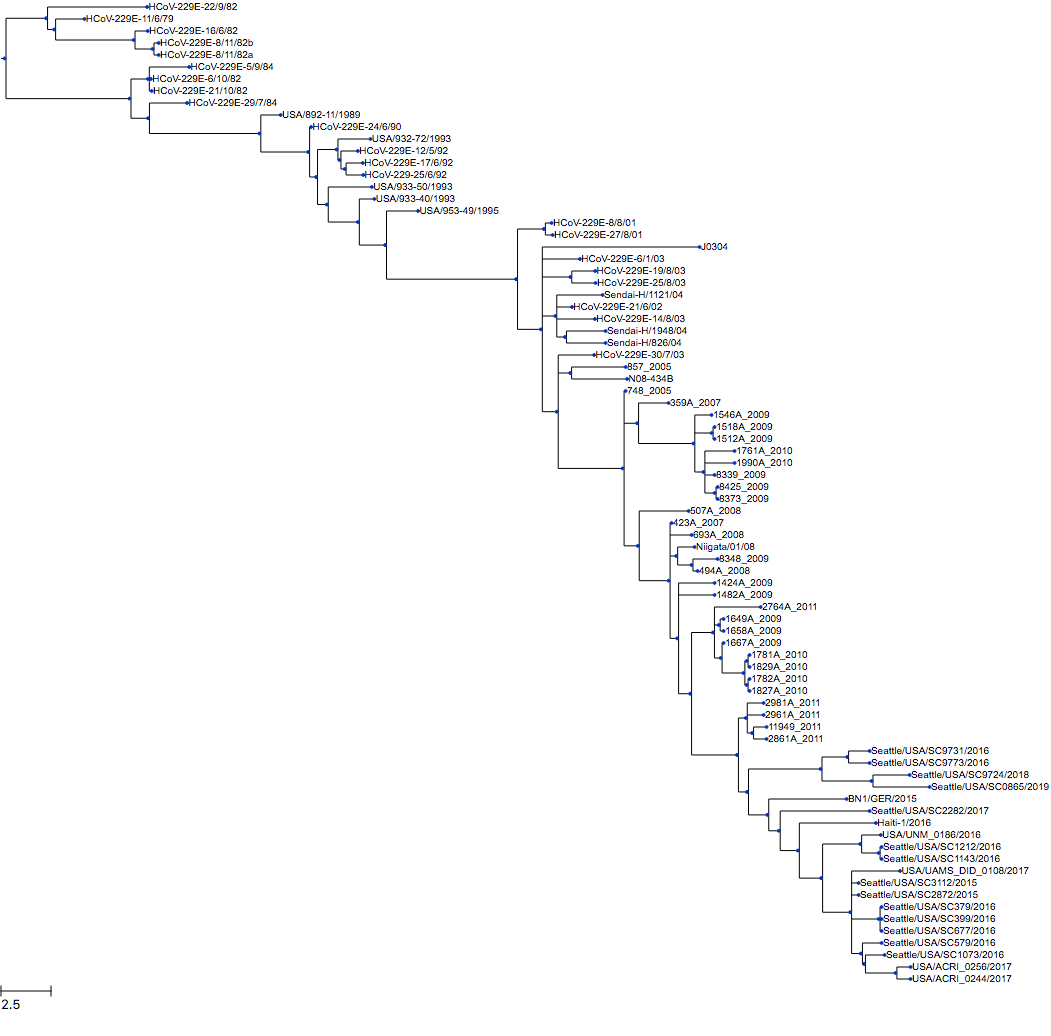

In [50]:
nexus_tree = Bio.Phylo.read('results/treetime/timetree.nexus', format='nexus')
with io.StringIO() as f:
    Bio.Phylo.write(nexus_tree, f, 'newick')
    f.seek(0)
    newick_str = f.read()
t = ete3.Tree(newick_str, format=1)

ts = ete3.TreeStyle()
ts.show_leaf_name = True  # show tip names
ts.scale = 20  # pixels per branch-length unit

t.render('%%inline', tree_style=ts)

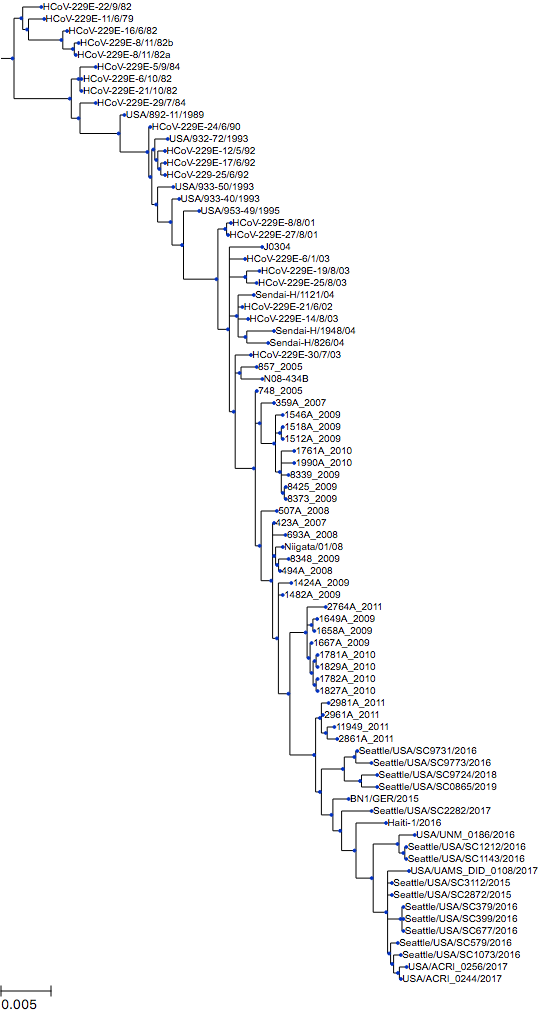

In [46]:
t.render('%%inline', tree_style=ts)